MemoryError: Unable to allocate 5.31 GiB for an array with shape (77215, 9235) and data type float64

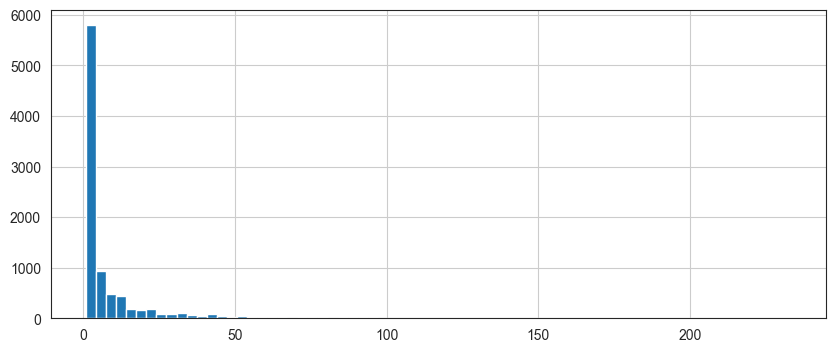

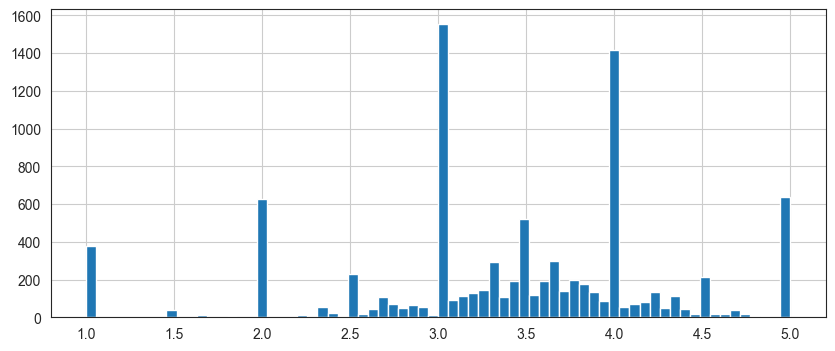

In [70]:
# import polars as pl
import re
from tqdm import tqdm
import matplotlib.pyplot as plt 
from apyori import apriori
import pandas as pd
import sqlite3 as db
import numpy as np 
import math 
import re 
from scipy.sparse import csr_matrix 
import seaborn as sns
sns.set_style('white')

#from surprise import Reader, Dataset, SVD, evaluate 
#from sklearn.feature_extraction import text 
#from sklearn.metrics.pairwise import cosine_similarity

'''con = db.connect('netflix_dev.db')
data = pd.read_sql_query("SELECT * FROM netflix_data", con)
data.head()

#Erstelle ein Dataframe mit einem average rating und einer Anzahl an Bewertungen 
data.groupby('film')['rating'].mean().sort_values(ascending= False).head()
data.groupby('film')['rating'].count().sort_values(ascending=False).head()

ratings = pd.DataFrame(data.groupby('film')['rating'].mean())
ratings.head()
ratings['Anzahl_Ratings'] = pd.DataFrame(data.groupby('film')['rating'].count())
ratings.head()

# Zwei visuelle Darstellungen der Verteilung von Anzahl der Ratings und Wahl der Ratings
plt.figure(figsize=(10,4))
ratings['Anzahl_Ratings'].hist(bins=70)

plt.figure(figsize =(10,4))
ratings['rating'].hist(bins=70)

#Erstellen einer Matrix mit Usern als Zeilen und Filmen als Spalten. Jede Zelle beschreibt das Rating des Users für den jeweiligen Film.
moviemat = data.pivot_table(index='user', columns='film', values ='rating')

# Gebe Filme, die am häufigsten bewertet wurden
ratings.sort_values('Anzahl_Ratings',ascending=False).head(10)
#ratings.head()


#Auswahl von zwei Filmen, die auf Korrelation überprüft werden
forrestgump_user_ratings = moviemat['11283']
pirates_caribbean_user_ratings = moviemat['1905']
forrestgump_user_ratings.head()

#Nutzen die Methode corrwith() um Korrelationen zwischen zwei pandas Series zu finden. 
similar_to_forrestgump = moviemat.corrwith(forrestgump_user_ratings)
similar_to_pirates_caribbean = moviemat.corrwith(pirates_caribbean_user_ratings)

#Korrelation Dataframe erstellen 
corr_forrestgump = pd.DataFrame(similar_to_forrestgump, columns=['correlation'])
corr_forrestgump.dropna(inplace=True)
corr_forrestgump.head()

# Dataframe nach Korrelation sortieren und somit die ähnlichsten Filme anzeigen 
corr_forrestgump.sort_values('correlation', ascending= False).head()

#Filme mit weniger als 100 Bewertungen rausfiltern
corr_forrestgump = corr_forrestgump.join(ratings['Anzahl_Ratings'])
corr_forrestgump.head()
corr_forrestgump[corr_forrestgump['Anzahl_Ratings']>100].sort_values('correlation', ascending = False).head()'''



Movie minimum times of review: 12.0
Customer minimum times of review: 2.0


In [80]:
data.shape
n_users = len(data.user.unique())
n_films = len(data.film.unique())
print("Number of unique users:", n_users)
print("Number of unique films:", n_films)
print("The Matrix will have:", n_films*n_films, "cells.")
print("Number of ratings:", len(data))
print("Therefore: ", len(data) / (n_users*n_films)*100, "% of the Matrix is filled.")


Number of unique users: 77215
Number of unique films: 9235
The Matrix will have: 85285225 cells.
Number of ratings: 100000
Therefore:  0.014023661633445955 % of the Matrix is filled.


ModuleNotFoundError: No module named 'torch'

In [89]:
#Content Based Recommendation System 
#TF*IDF algorithm --> shows the significant words; overview: Term Frequency (Frequency of a Word, how many times it is mentioned in the overview) * Inverse document frequency (The weight of rare words within the overview)
#Vektor Space Model 
#Calculating Cosine Similarity (Calculate Relation of words)


import numpy as np #Lineare Algebra 
import pandas as pd #Datenverarbeitung 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
from sklearn.cluster import KMeans

#df_movietitles  = pd.read_csv(r"C:\\Users\\julia\\OneDrive\\Desktop\\netflix_recommendation\\Source\d\ata\\movie_titles.csv")
df = pd.read_csv(r"C:\\Users\\julia\\OneDrive\\Desktop\\netflix_recommendation\\Source\\data\\movie_data.csv", sep='|')
columns = ['index', 'Title', 'Year', 'Response', 'Rated', 'Released', 'Runtime', 'Genre', 'Director', 'Writer', 'Actors', 'Overview', 'Language', 'Country', 'Awards', 'Poster', 'Ratings', 'Metascore', 'imdbRating', 'imdbVotes', 'imdbID', 'Type', 'DVD', 'BoxOffice', 'Production', 'Website']
df.columns = columns
unique_genres = df['Genre'].unique()
pd.set_option('display.max_rows', None)
# Ausgabe der eindeutigen Genres
# print(unique_genres)
# DataFrame anzeigen
df.head()
df['Overview']
tfidf = TfidfVectorizer(stop_words='english') 
df['Overview'] = df['Overview'].fillna("")
tfidf_matrix = tfidf.fit_transform(df['Overview']) #Build vector space # fit means providing data to your algorithm # transform means that the particular algorithm will perform transformation #coverting words into numbers
print("Number of unique words:", len(tfidf.vocabulary_))
#print(tfidf_matrix)


# Clustering nach Genres
kmeans = KMeans(n_clusters=10)  # Anzahl der Cluster anpassen
genre_clusters = kmeans.fit_predict(tfidf_matrix)

#Cosine Similarity Matrix berechnen 
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix) 
indices = pd.Series(df.index, index =df['Title']).drop_duplicates()


def get_recommendations(Title, genre, cosine_sim= cosine_sim, genre_clusters=genre_clusters):
    idx = indices[Title]
    # Cluster des Genres abrufen
    target_cluster = genre_clusters[idx]
    # Alle Filme im gleichen Cluster mit dem gleichen Genre auswählen
    cluster_indices = np.where(genre_clusters == target_cluster)[0]
    genre_indices = [i for i in cluster_indices if df['Genre'].iloc[i] == genre] # Gibt Empfehlungen mit gleichem Genre aus
    # Cosine Similarity Scores für ausgewählte Filme berechnen                               ]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = [x for x in sim_scores if x[0] in genre_indices]
    sim_scores = sim_scores[1:11]
    sim_index = [i[0] for i in sim_scores]
    print(df['Title'].iloc[sim_index])

get_recommendations('The Santa Clause 2', 'Comedy, Family, Fantasy')



Number of unique words: 16955


c:\Users\julia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


2403    Ernest Saves Christmas
4419                Fat Albert
2181          Wish Upon a Star
4350     Angels in the Endzone
137         Herbie Rides Again
683             Dr. Dolittle 2
801                     Casper
1349             Freaky Friday
1408             Freaky Friday
1453               Hocus Pocus
Name: Title, dtype: object


In [1]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
from sklearn.cluster import KMeans

# Einlesen der Daten
df = pd.read_csv(r"C:\\Users\\julia\\OneDrive\\Desktop\\netflix_recommendation\\Source\\data\\movie_data.csv", sep='|')
columns = ['index', 'Title', 'Year', 'Response', 'Rated', 'Released', 'Runtime', 'Genre', 'Director', 'Writer', 'Actors', 'Overview', 'Language', 'Country', 'Awards', 'Poster', 'Ratings', 'Metascore', 'imdbRating', 'imdbVotes', 'imdbID', 'Type', 'DVD', 'BoxOffice', 'Production', 'Website']
df.columns = columns

# Textvorverarbeitung und TF-IDF-Matrix erstellen
tfidf = TfidfVectorizer(stop_words='english') 
df['Overview'] = df['Overview'].fillna("")
tfidf_matrix = tfidf.fit_transform(df['Overview'])

# Clustering nach Genres
kmeans = KMeans(n_clusters=10)  # Anzahl der Cluster anpassen
genre_clusters = kmeans.fit_predict(tfidf_matrix)

# Cosine Similarity Matrix berechnen
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix) 
indices = pd.Series(df.index, index=df['Title']).drop_duplicates()

#Ausgabe der empfohlenen Titel 

'''def get_recommendations(title, cosine_sim=cosine_sim, genre_clusters=genre_clusters):
    idx = indices[title]
    target_cluster = genre_clusters[idx]
    cluster_indices = np.where(genre_clusters == target_cluster)[0]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    
    recommended_indices = []
    for i, score in sim_scores:
        if genre_clusters[i] == target_cluster or df['Genre'].iloc[i] == df['Genre'].iloc[idx]:
            recommended_indices.append(i)
            
    recommended_indices = recommended_indices[1:11]  # Anzahl der Empfehlungen anpassen
    recommended_titles = df['Title'].iloc[recommended_indices].tolist()
    return recommended_titles

# Beispielaufruf
recommendations = get_recommendations('Cats')
for title in recommendations:
    print(title)'''


#Inklusive Angabe, ob empfohlener Film im gleichen Cluster oder gleichem Genre ist
'''def get_recommendations(title, cosine_sim=cosine_sim, genre_clusters=genre_clusters):
    idx = indices[title]
    target_cluster = genre_clusters[idx]
    cluster_indices = np.where(genre_clusters == target_cluster)[0]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    
    recommended_indices = []
    for i, score in sim_scores:
        if genre_clusters[i] == target_cluster or df['Genre'].iloc[i] == df['Genre'].iloc[idx]:
            recommended_indices.append(i)
    
    recommended_indices = recommended_indices[1:21]  # Anzahl der Empfehlungen anpassen
    recommended_titles = df['Title'].iloc[recommended_indices].tolist()
    cluster_info = []
    genre_info = []
    
    for i in recommended_indices:
        if genre_clusters[i] == target_cluster:
            cluster_info.append("Im selben Cluster")
        else:
            cluster_info.append("In einem anderen Cluster")
            
        if df['Genre'].iloc[i] == df['Genre'].iloc[idx]:
            genre_info.append("Gleicher Genre")
        else:
            genre_info.append("Anderes Genre")
            
    recommendations_info = list(zip(recommended_titles, cluster_info, genre_info))
    return recommendations_info

# Beispielaufruf
recommendations = get_recommendations('Hulk')
for title, cluster, genre in recommendations:
    print(f"Filmtitel: {title}")
    print(f"Cluster: {cluster}")
    print(f"Genre: {genre}")
    print("------")'''


# Erste Implementation, Bonus für Filme mit gleichem Schauspieler 

'''def get_recommendations(title, cosine_sim=cosine_sim, genre_clusters=genre_clusters, bonus=0.1):
    idx = indices[title]
    target_cluster = genre_clusters[idx]
    cluster_indices = np.where(genre_clusters == target_cluster)[0]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    
    recommended_indices = []
    for i, score in sim_scores:
        if genre_clusters[i] == target_cluster or df['Genre'].iloc[i] == df['Genre'].iloc[idx]:
            recommended_indices.append(i)
    
    recommended_indices = recommended_indices[1:11]  # Anzahl der Empfehlungen anpassen
    recommended_titles = df['Title'].iloc[recommended_indices].tolist()
    cluster_info = []
    genre_info = []
    actor_info = []
    
    for i in recommended_indices:
        if genre_clusters[i] == target_cluster:
            cluster_info.append("Im selben Cluster")
        else:
            cluster_info.append("In einem anderen Cluster")
            
        if df['Genre'].iloc[i] == df['Genre'].iloc[idx]:
            genre_info.append("Gleicher Genre")
        else:
            genre_info.append("Anderes Genre")
            
        actor1 = set(df['Actors'].iloc[idx].split(','))
        actor2 = set(df['Actors'].iloc[i].split(','))
        common_actors = actor1.intersection(actor2)
        
        if len(common_actors) > 0:
            sim_score = sim_scores[i][1] + bonus
            actor_info.append(f"Gleicher Schauspieler: {common_actors.pop()} (Score: {sim_score})")
        else:
            sim_score = sim_scores[i][1]
            actor_info.append(f"Andere Schauspieler (Score: {sim_score})")
            
    recommendations_info = list(zip(recommended_titles, cluster_info, genre_info, actor_info))
    return recommendations_info

# Beispielaufruf
recommendations = get_recommendations('Sleepless in Seattle', bonus=0.2)
for title, cluster, genre, actor in recommendations:
    print(f"Filmtitel: {title}")
    print(f"Cluster: {cluster}")
    print(f"Genre: {genre}")
    print(f"Schauspieler: {actor}")
    print("------")'''

#Zweite Implementation Bonus für Schauspieler, ohne Berücksichtigung des Clusterings und des Genres

'''def get_recommendations(title, cosine_sim=cosine_sim, bonus=0.4):
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    
    recommended_indices = [i for i, _ in sim_scores[1:21]]  # Anzahl der Empfehlungen anpassen
    recommended_titles = df['Title'].iloc[recommended_indices].tolist()
    actor_info = []
    
    for i in recommended_indices:
        actor1 = set(df['Actors'].iloc[idx].split(','))
        actor2 = set(df['Actors'].iloc[i].split(','))
        common_actors = actor1.intersection(actor2)
        
        if len(common_actors) > 0:
            sim_score = sim_scores[i][1] + bonus
            actor_info.append(f"Gleiche Schauspieler: {common_actors.pop()} (Score: {sim_score})")
        else:
            sim_score = sim_scores[i][1] 
            actor_info.append(f"Andere Schauspieler (Score: {sim_score})")
            
    recommendations_info = list(zip(recommended_titles, actor_info))
    return recommendations_info

# Beispielaufruf
recommendations = get_recommendations('Star Wars: Episode IV: A New Hope', bonus=0.4)
for title, actor in recommendations:
    print(f"Filmtitel: {title}")
    print(f"Schauspieler: {actor}")
    print("------")'''

'''def get_recommendations(title, cosine_sim=cosine_sim, bonus=0.4):
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    
    recommended_indices = [i[0] for i in sim_scores[1:21]]  # Anzahl der Empfehlungen anpassen
    recommended_titles = df['Title'].iloc[recommended_indices].tolist()
    actor_info = []
    
    for i in recommended_indices:
        actor1 = set(df['Actors'].iloc[idx].split(','))
        actor2 = set(df['Actors'].iloc[i].split(','))
        common_actors = actor1.intersection(actor2)
        
        if len(common_actors) > 0:
            sim_score = sim_scores[i][1] + bonus
            actor_info.append(f"Gleiche Schauspieler: {common_actors.pop()} (Score: {sim_score})")
        else:
            sim_score = sim_scores[i][1] 
            actor_info.append(f"Andere Schauspieler (Score: {sim_score})")
            
    
    recommendations_info = list(zip(recommended_titles, actor_info))
    return recommendations_info


# Beispielaufruf
recommendations = get_recommendations('Star Wars: Episode IV: A New Hope', bonus=1)
for title, actor in recommendations:
    print(f"Filmtitel: {title}")
    print(f"Schauspieler: {actor}")
    print("------")'''


#Bonus für Schauspieler und Regisseur
'''def get_recommendations(title, cosine_sim=cosine_sim, bonus_actor=0.4, bonus_director=0.3):
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    
    recommended_indices = [i[0] for i in sim_scores[1:21]]  # Anzahl der Empfehlungen anpassen
    recommended_titles = df['Title'].iloc[recommended_indices].tolist()
    info = []
    
    for i in recommended_indices:
        actors1 = set(df['Actors'].iloc[idx].split(','))
        actors2 = set(df['Actors'].iloc[i].split(','))
        common_actors = actors1.intersection(actors2)
        
        director1 = df['Director'].iloc[idx]
        director2 = df['Director'].iloc[i]
        
        if len(common_actors) > 0:
            sim_score = sim_scores[i][1] + bonus_actor
            info.append(f"Gleiche Schauspieler: {common_actors.pop()} (Score: {sim_score})")
        elif director1 == director2:
            sim_score = sim_scores[i][1] + bonus_director
            info.append(f"Gleicher Regisseur: {director1} (Score: {sim_score})")
        else:
            sim_score = sim_scores[i][1] 
            info.append(f"Andere Schauspieler/Regisseur (Score: {sim_score})")
            
    recommendations_info = list(zip(recommended_titles, info))
    return recommendations_info'''

def get_recommendations(title, cosine_sim=cosine_sim, bonus_actor=0.4, bonus_same_director=0.3, bonus_same_genre=0.2, min_same_genre_count=4):
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    
    recommended_indices = [i[0] for i in sim_scores[1:101]]  # Anzahl der Empfehlungen anpassen
    recommended_titles = df['Title'].iloc[recommended_indices].tolist()
    info = []
    
    genre = df['Genre'].iloc[idx]
    director1 = df['Director'].iloc[idx]
    genre_counts = df['Genre'].value_counts()
    
    for i in recommended_indices:
        actors1 = set(df['Actors'].iloc[idx].split(','))
        actors2 = set(df['Actors'].iloc[i].split(','))
        common_actors = actors1.intersection(actors2)
        
        director2 = df['Director'].iloc[i]
        genre2 = df['Genre'].iloc[i]
        
        if len(common_actors) > 0:
            sim_score = sim_scores[i][1] + bonus_actor
            info.append(f"Gleiche Schauspieler: {common_actors.pop()} (Score: {sim_score})")
        elif director1 == director2:
            sim_score = sim_scores[i][1] + bonus_same_director
            info.append(f"Gleicher Regisseur: {director1} (Score: {sim_score})")
        elif genre == genre2 and genre_counts[genre2] >= min_same_genre_count:
            sim_score = sim_scores[i][1] + bonus_same_genre
            info.append(f"Andere Regisseur, aber gleiches Genre: {director2} (Score: {sim_score})")
        else:
            sim_score = sim_scores[i][1] 
            info.append(f"Andere Schauspieler/Regisseur/Genre (Score: {sim_score})")
            
    
    recommendations_info = list(zip(recommended_titles, info))
    return recommendations_info

# Beispielaufruf
recommendations = get_recommendations('Star Wars: Episode IV: A New Hope')
for title, actor in recommendations:
    print(f"Filmtitel: {title}")
    print(f"Schauspieler: {actor}")
    print("------")
#In dieser aktualisierten Version der get_recommendations-Funktion werden Filme vorgeschlagen, die entweder im gleichen Cluster wie der angegebene Film liegen oder das gleiche Genre haben.

c:\Users\julia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Filmtitel: Star Wars: Episode V: The Empire Strikes Back
Schauspieler: Gleiche Schauspieler:  Harrison Ford (Score: 0.4)
------
Filmtitel: Spaceballs
Schauspieler: Andere Schauspieler/Regisseur/Genre (Score: 0.0)
------
Filmtitel: Star Wars: Episode VI: Return of the Jedi
Schauspieler: Gleiche Schauspieler:  Harrison Ford (Score: 0.4)
------
Filmtitel: White Fang 2: Myth of the White Wolf
Schauspieler: Andere Schauspieler/Regisseur/Genre (Score: 0.0)
------
Filmtitel: Star Wars: Episode II: Attack of the Clones
Schauspieler: Gleicher Regisseur: George Lucas (Score: 0.3)
------
Filmtitel: Decoys
Schauspieler: Andere Schauspieler/Regisseur/Genre (Score: 0.0)
------
Filmtitel: Ice Station Zebra
Schauspieler: Andere Schauspieler/Regisseur/Genre (Score: 0.0)
------
Filmtitel: The Thief of Bagdad
Schauspieler: Andere Schauspieler/Regisseur/Genre (Score: 0.0)
------
Filmtitel: Wing and a Prayer
Schauspieler: Andere Schauspieler/Regisseur/Genre (Score: 0.0)
------
Filmtitel: Once Upon a Time i